In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from datetime import datetime
from collections import defaultdict

# Setting ggplot style for consistency
plt.style.use('ggplot')
sns.set_context("talk")

# Load the sampled data
data_incl_zero = pd.read_csv('sampled_filtered_log_returns.csv')
data_excl_zero = pd.read_csv('sampled_filtered_nonzero_log_returns.csv')

# Display the first few rows of each dataset
print("Data Including Zero Log Returns")
display(data_incl_zero.head())

print("Data Excluding Zero Log Returns")
display(data_excl_zero.head())


Data Including Zero Log Returns


,Symbol,Date,Close,LogReturn
0,GCWOF,2024-01-03 00:00:00+00:00,10.32,0.0
1,GCWOF,2024-01-04 00:00:00+00:00,10.32,0.0
2,GCWOF,2024-01-05 00:00:00+00:00,10.32,0.0
3,GCWOF,2024-01-08 00:00:00+00:00,10.32,0.0
4,GCWOF,2024-01-09 00:00:00+00:00,10.32,0.0


Data Excluding Zero Log Returns


,Symbol,Date,Close,LogReturn
0,LANRF,2024-01-04 00:00:00+00:00,0.0464,0.111606
1,LANRF,2024-01-08 00:00:00+00:00,0.0410,-0.123727
2,LANRF,2024-01-10 00:00:00+00:00,0.0379,-0.078621
3,LANRF,2024-01-12 00:00:00+00:00,0.0410,0.078621
4,LANRF,2024-01-17 00:00:00+00:00,0.0365,-0.116260


### Figure 1: Distribution of Mean Log Returns Across All Stocks

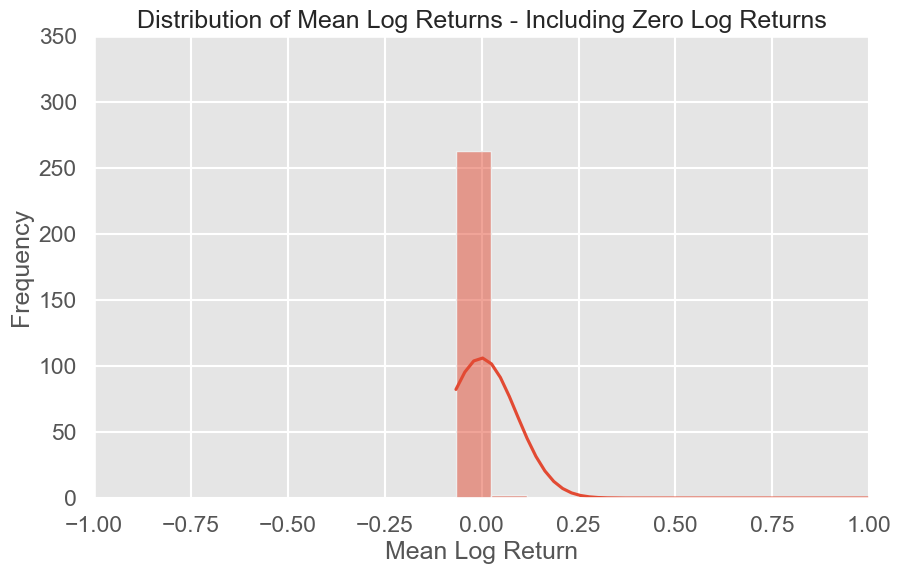

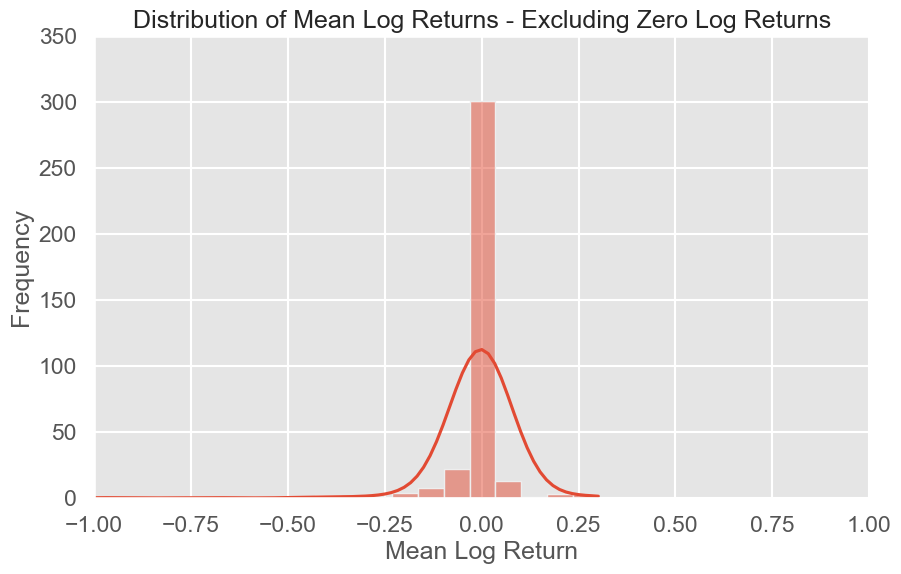

In [21]:
def plot_mean_log_returns_distribution(data, title, xlim=(-1, 1), ylim=(0, 350)):
    mean_log_returns = data.groupby('Symbol')['LogReturn'].mean()
    plt.figure(figsize=(10, 6))
    sns.histplot(mean_log_returns, bins=50, kde=True)
    plt.title(f'Distribution of Mean Log Returns - {title}')
    plt.xlabel('Mean Log Return')
    plt.ylabel('Frequency')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks(np.arange(xlim[0], xlim[1] + 0.25, 0.25))
    plt.show()

# Plot for both datasets with consistent x and y limits
plot_mean_log_returns_distribution(data_incl_zero, "Including Zero Log Returns")
plot_mean_log_returns_distribution(data_excl_zero, "Excluding Zero Log Returns")

### Figure 2: Volatility (Standard Deviation of Log Returns) Across Stocks

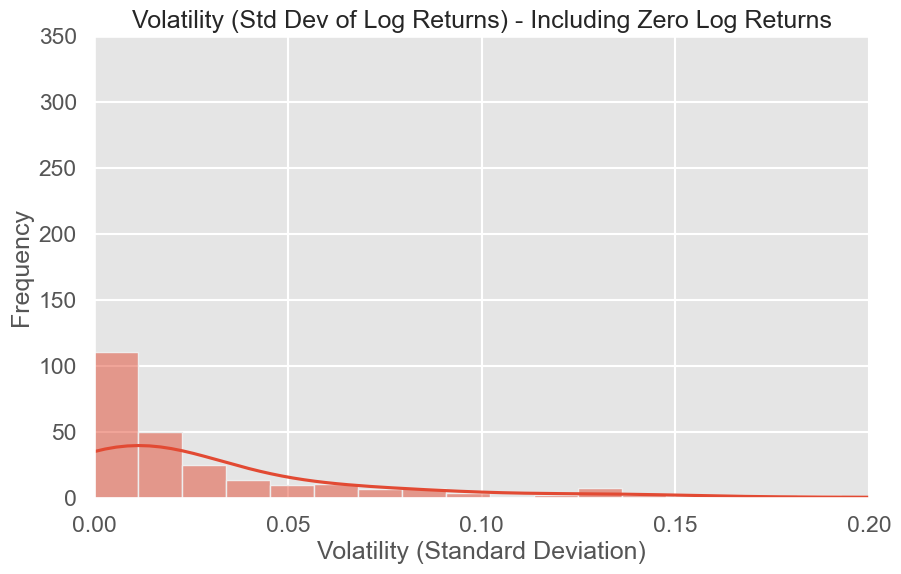

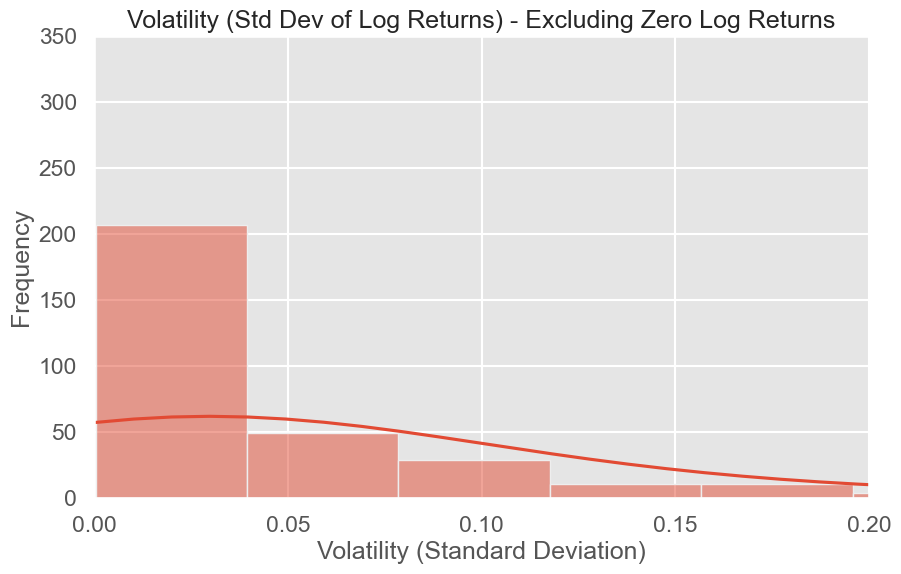

In [22]:
def plot_volatility_distribution(data, title, xlim=(0, 0.2), ylim=(0, 350)):
    volatility = data.groupby('Symbol')['LogReturn'].std()
    plt.figure(figsize=(10, 6))
    sns.histplot(volatility, bins=50, kde=True)
    plt.title(f'Volatility (Std Dev of Log Returns) - {title}')
    plt.xlabel('Volatility (Standard Deviation)')
    plt.ylabel('Frequency')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks(np.arange(xlim[0], xlim[1] + 0.05, 0.05))
    plt.show()

plot_volatility_distribution(data_incl_zero, "Including Zero Log Returns")
plot_volatility_distribution(data_excl_zero, "Excluding Zero Log Returns")

### Figure 3: Min vs. Max Log Returns for Each Stock

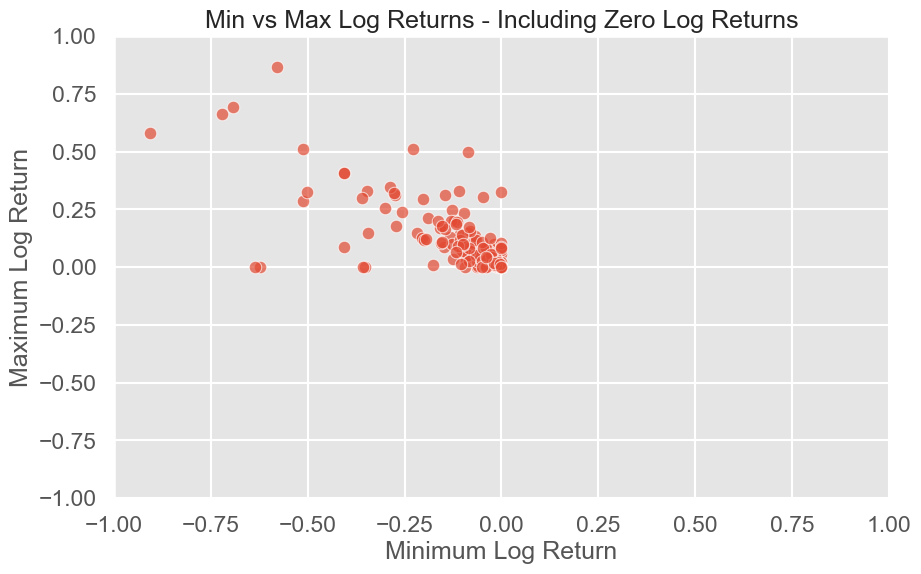

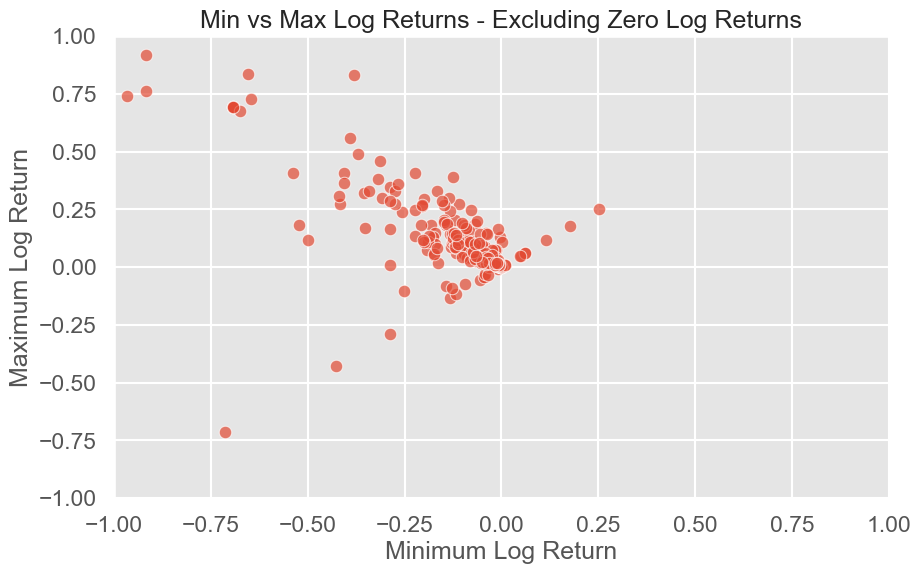

In [23]:
def plot_min_vs_max_log_returns(data, title, xlim=(-1, 1), ylim=(-1, 1)):
    min_returns = data.groupby('Symbol')['LogReturn'].min()
    max_returns = data.groupby('Symbol')['LogReturn'].max()
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=min_returns, y=max_returns, alpha=0.7)
    plt.title(f'Min vs Max Log Returns - {title}')
    plt.xlabel('Minimum Log Return')
    plt.ylabel('Maximum Log Return')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

plot_min_vs_max_log_returns(data_incl_zero, "Including Zero Log Returns")
plot_min_vs_max_log_returns(data_excl_zero, "Excluding Zero Log Returns")

### Figure 4: Mean Log Return vs. Volatility (Standard Deviation of Log Return)

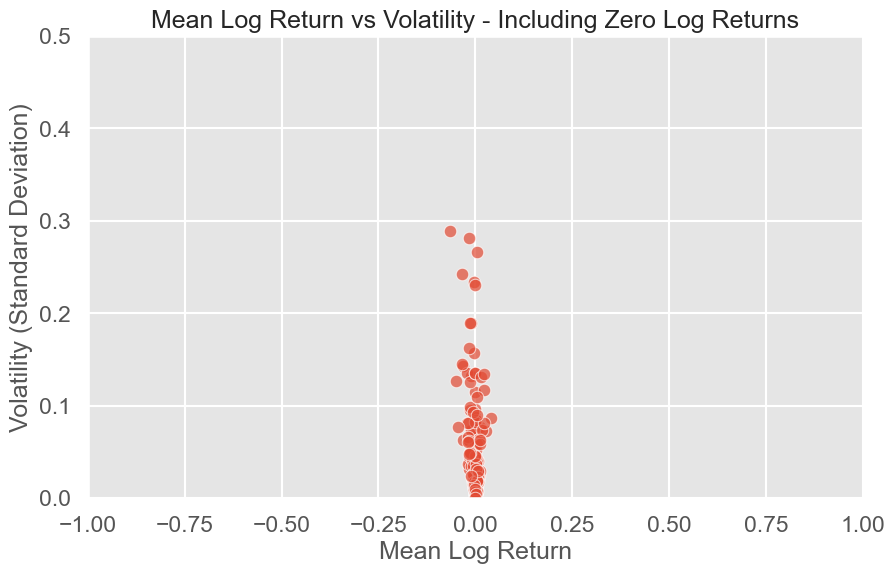

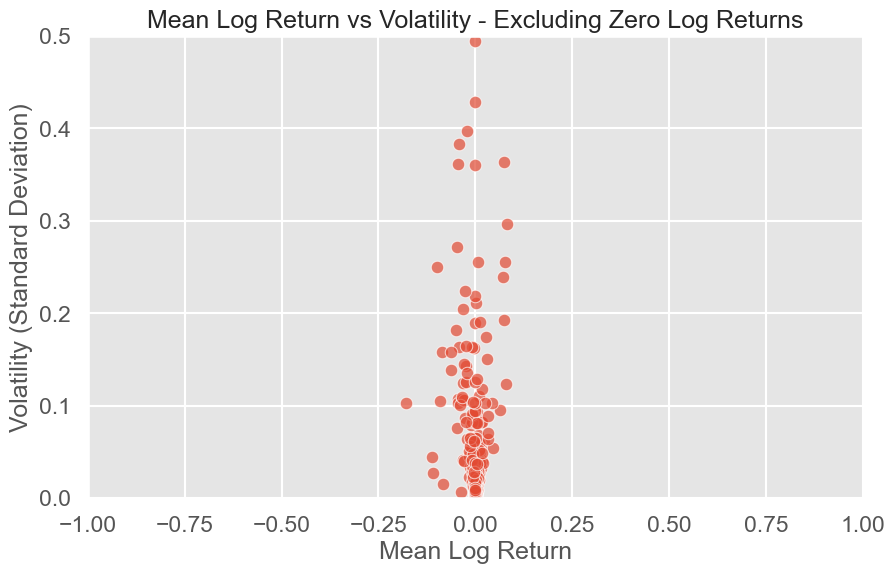

In [24]:
def plot_mean_return_vs_volatility(data, title, xlim=(-1, 1), ylim=(0, 0.5)):
    mean_returns = data.groupby('Symbol')['LogReturn'].mean()
    volatility = data.groupby('Symbol')['LogReturn'].std()
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=mean_returns, y=volatility, alpha=0.7)
    plt.title(f'Mean Log Return vs Volatility - {title}')
    plt.xlabel('Mean Log Return')
    plt.ylabel('Volatility (Standard Deviation)')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

plot_mean_return_vs_volatility(data_incl_zero, "Including Zero Log Returns")
plot_mean_return_vs_volatility(data_excl_zero, "Excluding Zero Log Returns")


### Figure 5: Correlation Matrix of Summary Statistics


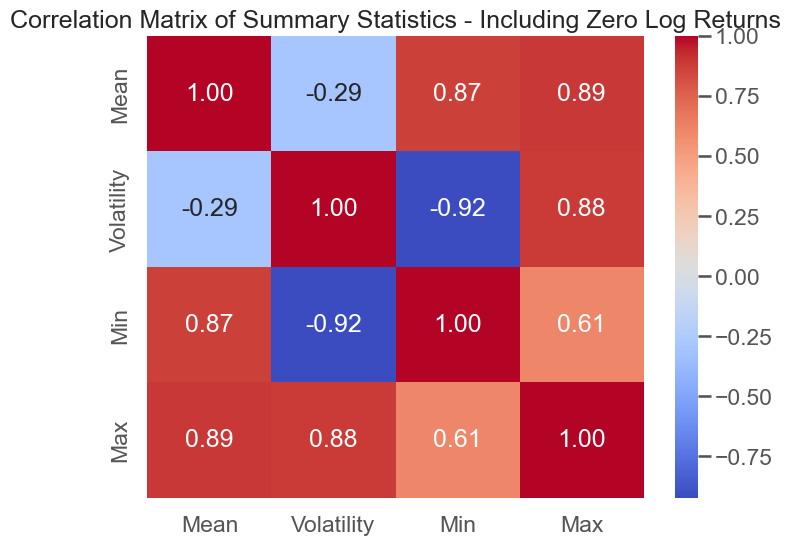

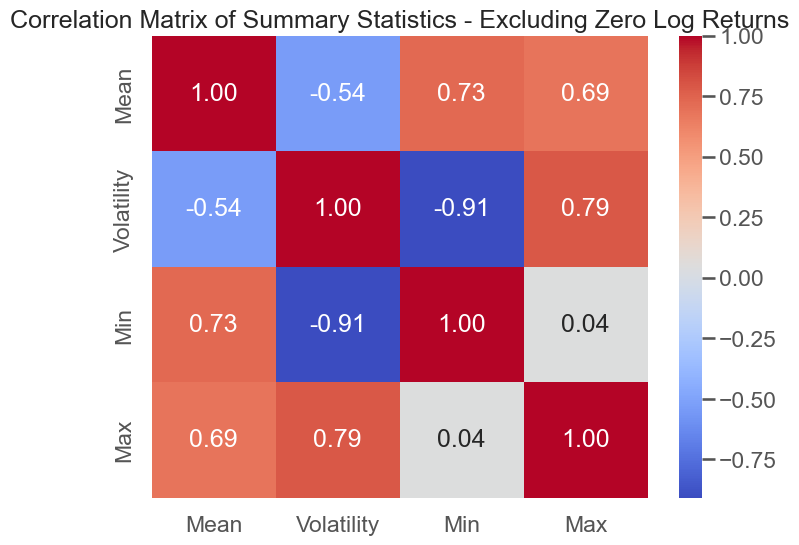

In [25]:
def plot_correlation_matrix(data, title):
    summary_stats = data.groupby('Symbol')['LogReturn'].agg(['mean', 'std', 'min', 'max']).rename(
        columns={'mean': 'Mean', 'std': 'Volatility', 'min': 'Min', 'max': 'Max'}
    )
    corr_matrix = summary_stats.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f'Correlation Matrix of Summary Statistics - {title}')
    plt.show()

plot_correlation_matrix(data_incl_zero, "Including Zero Log Returns")
plot_correlation_matrix(data_excl_zero, "Excluding Zero Log Returns")

### Figure 6: Autocorrelation Analysis (30-Day Lag)


/Users/justingottlieb/Desktop/market-data/finance_analysis_venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/justingottlieb/Desktop/market-data/finance_analysis_venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/justingottlieb/Desktop/market-data/finance_analysis_venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/justingottlieb/Desktop/market-data/finance_analysis_venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/justingottlieb/Desktop/market-data/finance_analysis_venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: inv

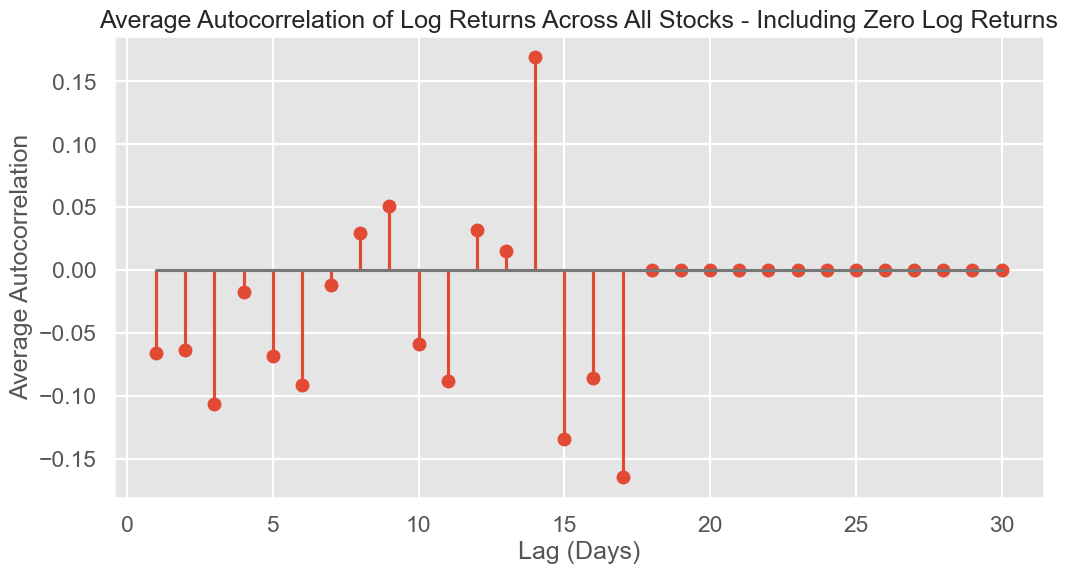

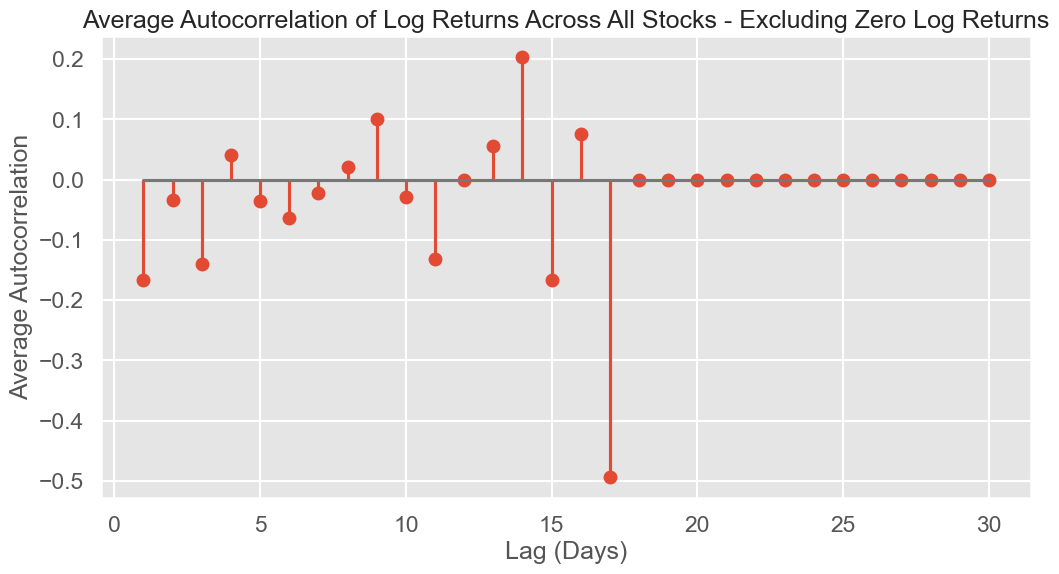

In [30]:
data_incl_zero = pd.read_csv('sampled_filtered_log_returns.csv')
data_excl_zero = pd.read_csv('sampled_filtered_nonzero_log_returns.csv')

max_lags = 30

def plot_average_autocorrelation(data, title, max_lags=30):
   
    autocorrelation_results = defaultdict(list)
    
    for symbol in data['Symbol'].unique():
        stock_data = data[data['Symbol'] == symbol]
        log_returns = stock_data['LogReturn'].dropna()  

        for lag in range(1, max_lags + 1):
            if len(log_returns) > lag:
                autocorr = log_returns.autocorr(lag=lag)  
                if not pd.isna(autocorr):  
                    autocorrelation_results[lag].append(autocorr)

    average_autocorrelations = {
        lag: (sum(autocorrelation_results.get(lag, [])) / len(autocorrelation_results.get(lag, []))
              if len(autocorrelation_results.get(lag, [])) > 0 else 0)
        for lag in range(1, max_lags + 1)
    }

    plt.figure(figsize=(12, 6))
    plt.stem(range(1, max_lags + 1), list(average_autocorrelations.values()))
    plt.xlabel('Lag (Days)')
    plt.ylabel('Average Autocorrelation')
    plt.title(f'Average Autocorrelation of Log Returns Across All Stocks - {title}')
    plt.show()
plot_average_autocorrelation(data_incl_zero, "Including Zero Log Returns", max_lags)
plot_average_autocorrelation(data_excl_zero, "Excluding Zero Log Returns", max_lags)

### Figure 7: Day-of-Week Effect on Log Returns

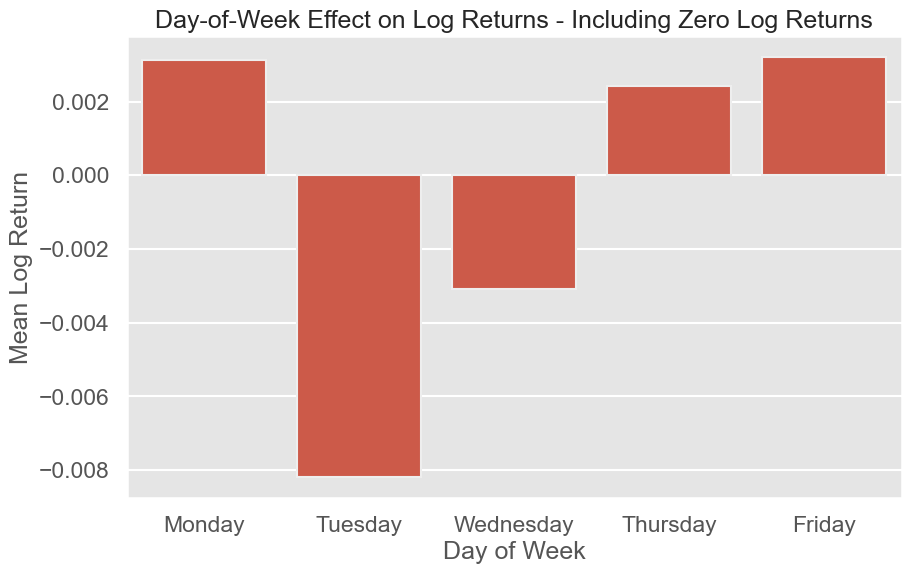

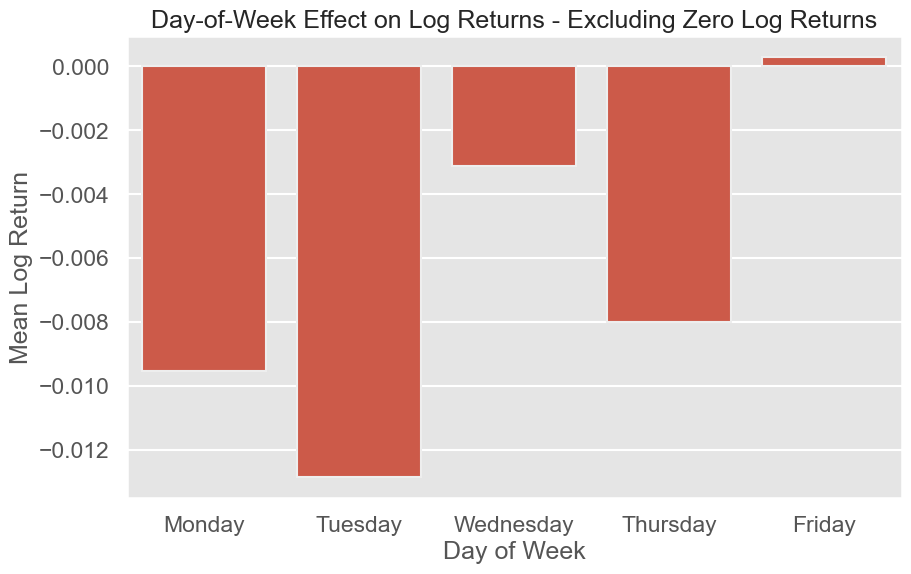

In [32]:
def plot_day_of_week_effect(data, title):
    data['Date'] = pd.to_datetime(data['Date'])
    data['DayOfWeek'] = data['Date'].dt.day_name()
    mean_returns_by_day = data.groupby('DayOfWeek')['LogReturn'].mean()
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    mean_returns_by_day = mean_returns_by_day.reindex(days)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean_returns_by_day.index, y=mean_returns_by_day.values)
    plt.title(f'Day-of-Week Effect on Log Returns - {title}')
    plt.xlabel('Day of Week')
    plt.ylabel('Mean Log Return')
    plt.show()

plot_day_of_week_effect(data_incl_zero, "Including Zero Log Returns")
plot_day_of_week_effect(data_excl_zero, "Excluding Zero Log Returns")

### Figure 8: 30-Day Rolling Volatility Across All Stocks

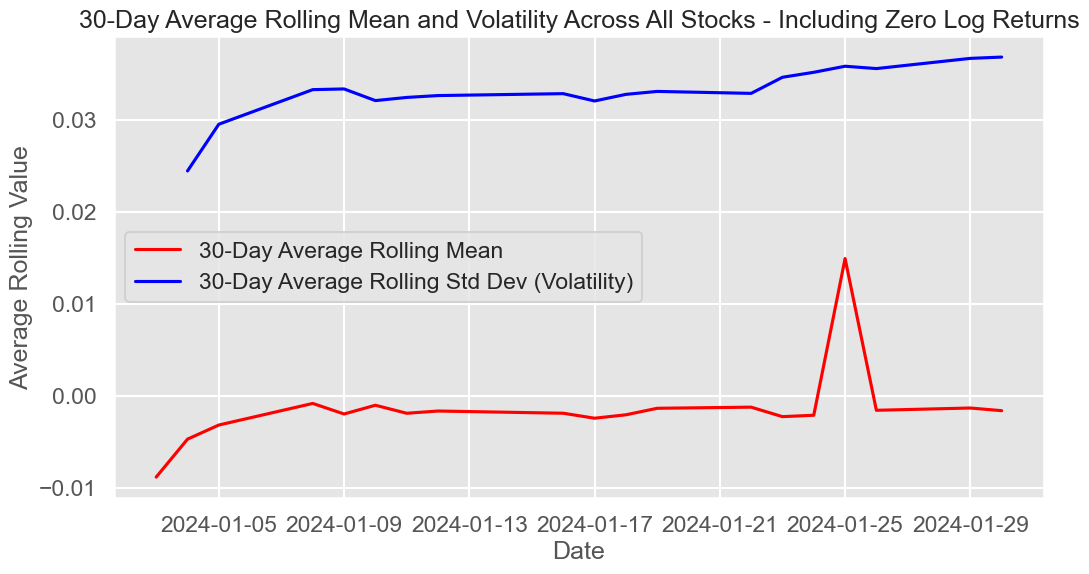

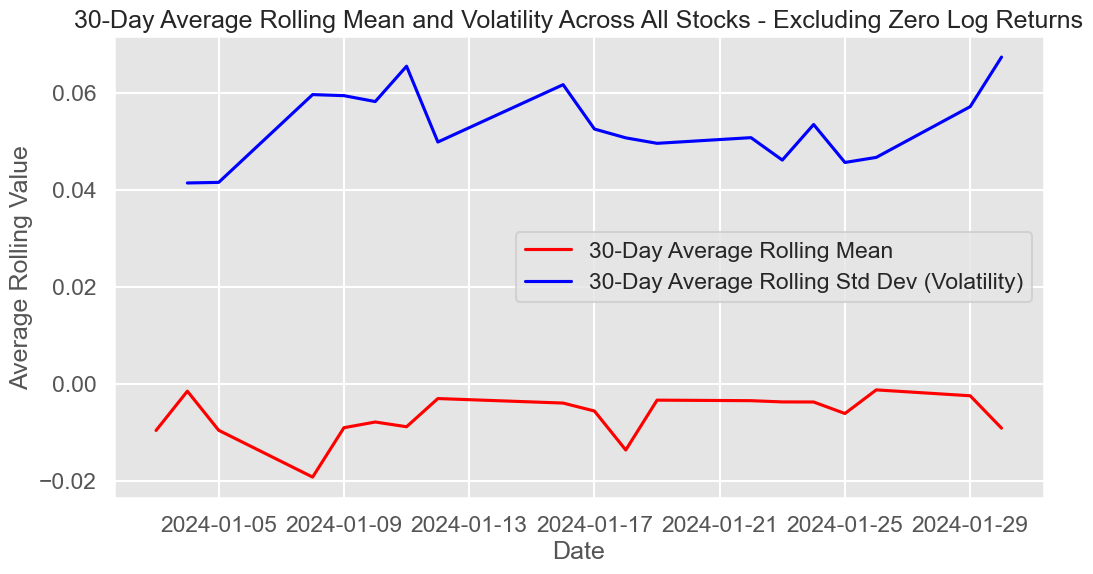

In [35]:
data_incl_zero = pd.read_csv('sampled_filtered_log_returns.csv')
data_excl_zero = pd.read_csv('sampled_filtered_nonzero_log_returns.csv')

data_incl_zero['Date'] = pd.to_datetime(data_incl_zero['Date'])
data_excl_zero['Date'] = pd.to_datetime(data_excl_zero['Date'])

def plot_30_day_rolling_mean_std(data, title, window=30):
    data['RollingStd'] = data.groupby('Symbol')['LogReturn'].transform(lambda x: x.rolling(window=window, min_periods=1).std())
    data['RollingMean'] = data.groupby('Symbol')['LogReturn'].transform(lambda x: x.rolling(window=window, min_periods=1).mean())
    
    average_rolling_std = data.groupby('Date')['RollingStd'].mean().dropna()
    average_rolling_mean = data.groupby('Date')['RollingMean'].mean().dropna()
    
   
    plt.figure(figsize=(12, 6))
    plt.plot(average_rolling_mean.index, average_rolling_mean.values, label=f'{window}-Day Average Rolling Mean', color='red')
    plt.plot(average_rolling_std.index, average_rolling_std.values, label=f'{window}-Day Average Rolling Std Dev (Volatility)', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Average Rolling Value')
    plt.title(f'{window}-Day Average Rolling Mean and Volatility Across All Stocks - {title}')
    plt.legend()
    plt.show()

plot_30_day_rolling_mean_std(data_incl_zero, "Including Zero Log Returns")
plot_30_day_rolling_mean_std(data_excl_zero, "Excluding Zero Log Returns")